In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [28]:
# defining a network class

class Network:
    
    #initialize neural nets
    def __init__(self,inodes,hnodes,onodes,lrate):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        
        self.wih = np.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who = np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.lrate = lrate
        
        self.activation = lambda x: scipy.special.expit(x)
        
        pass        
        
       
    def train(self,input_list,target_list):
        
        inputs = np.array(input_list,ndmin=2).T
        
        targets = np.array(target_list,ndmin=2).T
    
    
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        #update weights between hidden & output layers
        self.who += self.lrate *np.dot((output_errors*final_outputs*(1.0-final_outputs)),
                                       np.transpose(hidden_outputs))
        
        
        #update weigths between input & hidden layers
        self.wih +=  self.lrate * np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),
                                         np.transpose(inputs))
        
    
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation(final_inputs)
        
        return final_outputs

In [29]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
lrate = 0.1

# create instance of neural network
net = Network(input_nodes,hidden_nodes,output_nodes, lrate)

In [30]:
#reading the file
train_data_file = open('/Users/abdygaziev/Documents/FlatironMaterials/Projects/data/mnist/mnist_train.csv','r')
train_data_list = train_data_file.readlines()
train_data_file.close()

In [7]:
# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in train_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        net.train(inputs, targets)
        pass
    pass

In [7]:
#reading the file
test_data_file = open('/Users/abdygaziev/Documents/FlatironMaterials/Projects/data/mnist/mnist_test.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [8]:
all_values = test_data_list[0].split(',')
all_values[0]

'7'

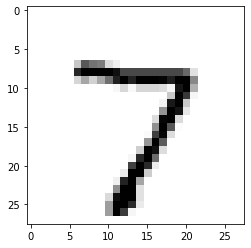

In [9]:
img_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(img_array, cmap='Greys',interpolation=None);

In [10]:
net.query((np.asfarray(all_values[1:])/255.0 * 0.99 )+ 0.01)

array([[0.00993929],
       [0.00760024],
       [0.01262519],
       [0.00527727],
       [0.01103556],
       [0.00110981],
       [0.00565114],
       [0.98354126],
       [0.01196911],
       [0.00858811]])

In [11]:
# test the network
score_card = []

for record in test_data_list:
    all_values = record.split(',')
    
    #correct labesl
    correct_label = [int(all_values[0])]
    print('correct label: ',correct_label)
    
    #normalize inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    outputs = net.query(inputs)
    
    #index of max value corresponds to the label
    label = np.argmax(outputs)
    print('networks output', label)
    
    #append to list if correct/incorrect:
    if (label==correct_label):
        score_card.append(1)
    else:
        score_card.append(0)
        pass
    pass
    

correct label:  [7]
networks output 7
correct label:  [2]
networks output 2
correct label:  [1]
networks output 1
correct label:  [0]
networks output 0
correct label:  [4]
networks output 4
correct label:  [1]
networks output 1
correct label:  [4]
networks output 4
correct label:  [9]
networks output 9
correct label:  [5]
networks output 5
correct label:  [9]
networks output 9
correct label:  [0]
networks output 0
correct label:  [6]
networks output 6
correct label:  [9]
networks output 9
correct label:  [0]
networks output 0
correct label:  [1]
networks output 1
correct label:  [5]
networks output 5
correct label:  [9]
networks output 9
correct label:  [7]
networks output 7
correct label:  [3]
networks output 3
correct label:  [4]
networks output 4
correct label:  [9]
networks output 9
correct label:  [6]
networks output 6
correct label:  [6]
networks output 6
correct label:  [5]
networks output 5
correct label:  [4]
networks output 4
correct label:  [0]
networks output 0
correct labe

In [12]:
# calculate the performance

score_card_array = np.asarray(score_card)
print(score_card_array.sum() / score_card_array.size)

#we have 95% of accuracy

0.973
